In [116]:
import pandas as pd
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [92]:
file = '../data/alkon-hinnasto-tekstitiedostona.csv'

In [93]:
df = pd.read_csv(file, skiprows=2)

In [94]:
display(df.shape)
display(df.Tyyppi.unique())

(11247, 30)

array(['punaviinit', 'roseeviinit', 'valkoviinit', nan, 'rommit',
       'konjakit', 'viskit', 'oluet', 'siiderit', 'juomasekoitukset',
       'alkoholittomat', 'lahja- ja juomatarvikkeet',
       'Jälkiruokaviinit, väkevöidyt ja muut viinit',
       'Brandyt, Armanjakit ja Calvadosit', 'Ginit ja maustetut viinat',
       'Liköörit ja Katkerot', 'kuohuviinit & samppanjat',
       'vodkat ja viinat'], dtype=object)

In [95]:
df = df[df['Tyyppi'] == 'oluet']
display(df.shape)

(1156, 30)

In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1156 entries, 6264 to 8234
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Numero                  1156 non-null   int64  
 1   Nimi                    1156 non-null   object 
 2   Valmistaja              1156 non-null   object 
 3   Pullokoko               1156 non-null   object 
 4   Hinta                   1156 non-null   float64
 5   Litrahinta              1156 non-null   float64
 6   Uutuus                  77 non-null     object 
 7   Hinnastojärjestyskoodi  1156 non-null   object 
 8   Tyyppi                  1156 non-null   object 
 9   Alatyyppi               829 non-null    object 
 10  Erityisryhmä            227 non-null    object 
 11  Oluttyyppi              1156 non-null   object 
 12  Valmistusmaa            1156 non-null   object 
 13  Alue                    0 non-null      object 
 14  Vuosikerta              17 non-null  

In [97]:
df.head()

,Numero,Nimi,Valmistaja,Pullokoko,Hinta,Litrahinta,Uutuus,Hinnastojärjestyskoodi,Tyyppi,Alatyyppi,...,Suljentatyyppi,Alkoholi-%,Hapot g/l,Sokeri g/l,Kantavierrep-%,Väri EBC,Katkerot EBU,Energia kcal/100 ml,Valikoima,EAN
6264,718897,Maxwell Honey Mead,Maxwell Wines,"0,75 l",18.04,23.92,NaN,600,oluet,Erikoisuus,...,metallinen kierrekapseli,12.5,NaN,NaN,26.6,NaN,NaN,100.0,vakiovalikoima,9317705000107
6265,715894,Achel Blond,De Achelse Kluis,"0,33 l",5.01,15.18,NaN,600,oluet,Erikoisuus,...,kruunukorkki,8.0,NaN,NaN,17.8,15.9,23.0,70.0,vakiovalikoima,5425007658828
6266,758594,Achel Bruin,De Achelse Kluis,"0,33 l",5.34,16.18,NaN,600,oluet,Erikoisuus,...,kruunukorkki,8.0,NaN,NaN,18.5,41.8,24.0,70.0,vakiovalikoima,5425007658880
6267,730097,Achel Extra Bruin,De Achelse Kluis,"0,75 l",15.51,20.68,NaN,600,oluet,Erikoisuus,...,kruunukorkki,9.5,NaN,NaN,19.4,70.5,18.0,70.0,vakiovalikoima,5425007658859
6268,919855,Alvinne Phi Blond Sour Ale,Brouwerij Alvinne NV,"0,33 l",5.42,16.42,NaN,600,oluet,Erikoisuus,...,kruunukorkki,8.0,NaN,NaN,17.6,NaN,7.0,70.0,tilausvalikoima,5425031890355


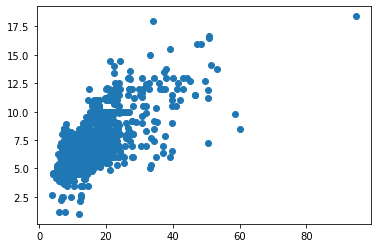

In [98]:
plt.scatter(df['Litrahinta'], df['Alkoholi-%'])
plt.show()

,count_of_products,mean_price,mean_litre_price,mean_alcohol_percentage
Alatyyppi,,,,
Erikoisuus,254,8.263465,18.956890,7.092520
Stout & Porter,186,8.570860,22.360806,9.469355
Lager,120,6.947500,7.756000,5.157500
Ale,106,7.805660,16.149906,7.603774
Vehnäolut,62,4.203226,9.673871,5.850000
Vahva lager,45,4.986000,8.822222,7.322222
Pils,31,4.679032,8.973871,5.038710
Tumma lager,23,3.786522,8.395217,4.978261
Rosee ja muut viinit,2,37.020000,17.900000,7.150000


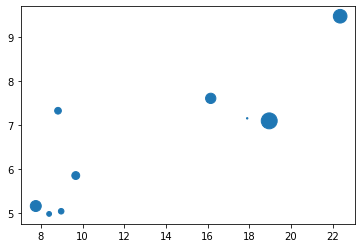

In [99]:
df_alatyypit = df.groupby(['Alatyyppi']).agg(
    count_of_products = ('Numero', 'count'),
    mean_price = ('Hinta', 'mean'),
    mean_litre_price = ('Litrahinta', 'mean'),
    mean_alcohol_percentage = ('Alkoholi-%', 'mean')
).sort_values(by='count_of_products',ascending=False)
display(df_alatyypit.head(10))
plt.scatter('mean_litre_price', 'mean_alcohol_percentage', s='count_of_products', data=df_alatyypit)
plt.show()

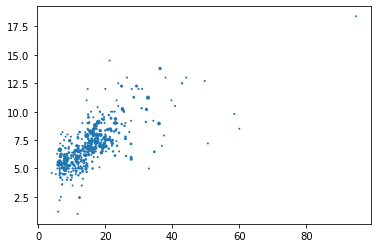

In [100]:
df_valmistaja = df.groupby(['Valmistaja']).agg(
    count_of_products = ('Numero', 'count'),
    mean_price = ('Hinta', 'mean'),
    mean_litre_price = ('Litrahinta', 'mean'),
    mean_alcohol_percentage = ('Alkoholi-%', 'mean')
).sort_values(by='count_of_products',ascending=False)
df_valmistaja.head(20)
plt.scatter('mean_litre_price', 'mean_alcohol_percentage', s='count_of_products', data=df_valmistaja)
plt.show()

In [101]:
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression

In [102]:
kmeans = KMeans(n_clusters=10, random_state=0).fit(df[['Litrahinta', 'Alkoholi-%']])

In [103]:
centroids = kmeans.cluster_centers_

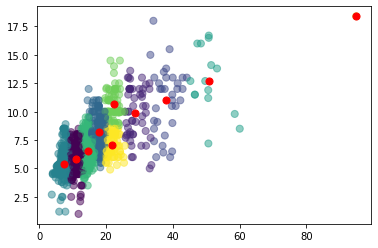

In [104]:
plt.scatter(df['Litrahinta'], df['Alkoholi-%'], c= kmeans.labels_.astype(float), s=50, alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)
plt.show()

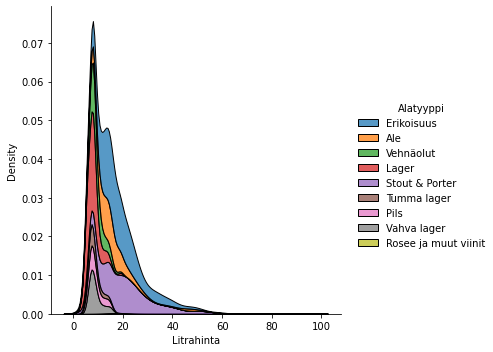

In [105]:
sns.displot(df, x='Litrahinta', hue='Alatyyppi', kind="kde", multiple="stack")

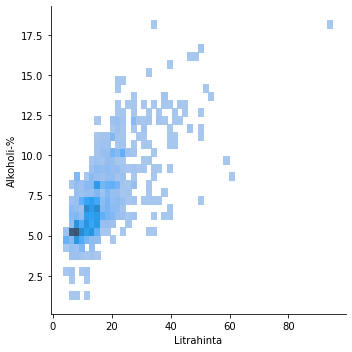

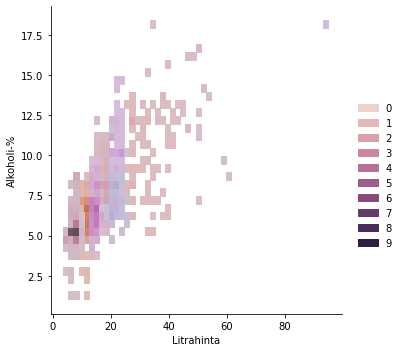

In [106]:
sns.displot(df, x='Litrahinta', y='Alkoholi-%')
sns.displot(df, x='Litrahinta', y='Alkoholi-%', hue=kmeans.labels_)

/Users/kukkojoo/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:1077: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/kukkojoo/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:1181: UserWarning: No contour levels were found within the data range.
  cset = contour_func(


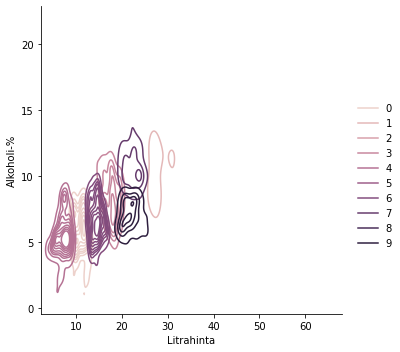

In [107]:
sns.displot(df, x='Litrahinta', y='Alkoholi-%', kind='kde', hue=kmeans.labels_)

In [108]:
df['Cluster'] = kmeans.labels_

In [109]:
df

,Numero,Nimi,Valmistaja,Pullokoko,Hinta,Litrahinta,Uutuus,Hinnastojärjestyskoodi,Tyyppi,Alatyyppi,...,Alkoholi-%,Hapot g/l,Sokeri g/l,Kantavierrep-%,Väri EBC,Katkerot EBU,Energia kcal/100 ml,Valikoima,EAN,Cluster
6264,718897,Maxwell Honey Mead,Maxwell Wines,"0,75 l",18.04,23.92,NaN,600,oluet,Erikoisuus,...,12.5,NaN,NaN,26.6,NaN,NaN,100.0,vakiovalikoima,9317705000107,7
6265,715894,Achel Blond,De Achelse Kluis,"0,33 l",5.01,15.18,NaN,600,oluet,Erikoisuus,...,8.0,NaN,NaN,17.8,15.9,23.0,70.0,vakiovalikoima,5425007658828,6
6266,758594,Achel Bruin,De Achelse Kluis,"0,33 l",5.34,16.18,NaN,600,oluet,Erikoisuus,...,8.0,NaN,NaN,18.5,41.8,24.0,70.0,vakiovalikoima,5425007658880,3
6267,730097,Achel Extra Bruin,De Achelse Kluis,"0,75 l",15.51,20.68,NaN,600,oluet,Erikoisuus,...,9.5,NaN,NaN,19.4,70.5,18.0,70.0,vakiovalikoima,5425007658859,7
6268,919855,Alvinne Phi Blond Sour Ale,Brouwerij Alvinne NV,"0,33 l",5.42,16.42,NaN,600,oluet,Erikoisuus,...,8.0,NaN,NaN,17.6,NaN,7.0,70.0,tilausvalikoima,5425031890355,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7415,911916,Stone Southern Charred 2015,Stone Brewing,"0,5 l",22.63,45.26,NaN,600,oluet,Ale,...,12.7,NaN,NaN,26.5,84.5,55.0,100.0,tilausvalikoima,636251830341,5
7416,935551,Westbrook Mexican Cake Imperial Stout,Westbrook Brewing,"0,65 l",26.56,40.86,NaN,600,oluet,Stout & Porter,...,10.5,NaN,NaN,26.0,NaN,49.0,100.0,tilausvalikoima,856467003074,2
8202,906362,Oud Beersel Jasmine Flower Infused Lambic hana...,Oud Beersel,"3,1 l",47.35,15.27,NaN,600,oluet,Erikoisuus,...,6.8,NaN,NaN,13.1,NaN,22.0,50.0,tilausvalikoima,5425018070893,6
8203,951272,Oud Beersel Rozenlambiek hanapakkaus,Oud Beersel,"3,1 l",47.35,15.27,NaN,600,oluet,Rosee ja muut viinit,...,6.8,NaN,NaN,12.9,NaN,17.0,50.0,tilausvalikoima,5425018070626,6


,count_of_products,mean_price,median_price,mean_litre_price,median_litre_price,mean_alcohol_percentage
Cluster,,,,,,
6,263,5.637110,4.950,14.467795,14.520,6.520152
4,249,5.470321,3.690,7.283976,7.520,5.388353
0,229,6.045590,3.990,11.124629,11.320,5.809170
3,148,6.820473,6.045,17.809730,17.975,8.166216
9,88,9.932727,8.975,21.774432,21.535,7.044318
7,75,8.724800,7.850,22.353733,22.480,10.682667
1,54,14.078148,10.960,28.807037,27.905,9.909259
2,34,16.728529,14.020,38.080294,37.800,10.988235
5,15,23.508000,18.990,50.695333,50.590,12.673333


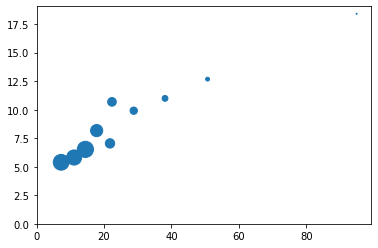

In [122]:
df_cluster = df.groupby(['Cluster']).agg(
    count_of_products = ('Numero', 'count'),
    mean_price = ('Hinta', 'mean'),
    median_price = ('Hinta', 'median'),
    mean_litre_price = ('Litrahinta', 'mean'),
    median_litre_price = ('Litrahinta', 'median'),
    mean_alcohol_percentage = ('Alkoholi-%', 'mean')
).sort_values(by='count_of_products',ascending=False)
display(df_cluster.head(10))
plt.scatter('mean_litre_price', 'mean_alcohol_percentage', s='count_of_products', data=df_cluster)
plt.xlim(0)
plt.ylim(0)
plt.show()

[(0.0, 50.0)]

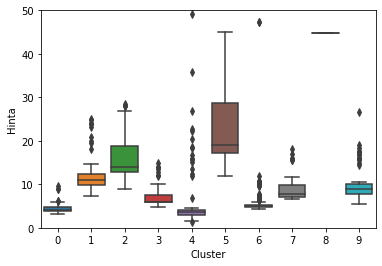

In [125]:
p = sns.boxplot(x="Cluster", y="Hinta", data=df)
p.set(ylim=(0, 50))

[(0.0, 19.27)]

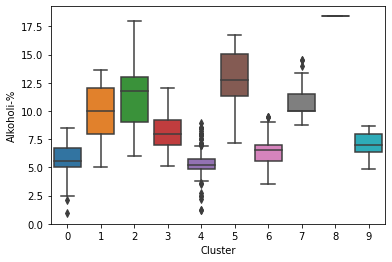

In [127]:
p = sns.boxplot(x="Cluster", y="Alkoholi-%", data=df)
p.set(ylim=(0, None))